In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import skimage
from skimage.io import imsave

In [2]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



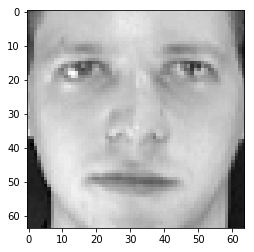

In [3]:
plt.imshow(faces.data[0].reshape(64, 64), cmap=plt.cm.gray)

In [5]:
# Save first 10 guys
for i in range(10):
    imsave('pics/faces/face_' + str(i) + '/face.jpg', faces.data[i * 10].reshape(64, 64))

/home/nico/.virtualenvs/bordel/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [9]:
# save images with rank k approximation of first 10 guys
pca = PCA()
pca.fit(faces.data)

for face in range(10):
    trans = pca.transform(faces.data[face * 10].reshape(1, -1))  # Reshape for scikit learn
    for k in range(200):
        rank_k_approx = trans[:, :k].dot(pca.components_[:k]) + pca.mean_
        imsave('pics/faces/face_' + str(face) + '/{:>03}'.format(str(k)) + '.jpg', rank_k_approx.reshape(64, 64))

/home/nico/.virtualenvs/bordel/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [8]:
# Save first 10 eigenfaces.
# Need to rescale intensity else image contrast is too low
for i in range(10):
    imsave('pics/faces/eigenface_' + str(i) + '.jpg', skimage.exposure.rescale_intensity(pca.components_[i].reshape(64, 64)))

/home/nico/.virtualenvs/bordel/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


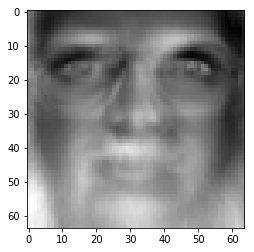

In [70]:
plt.imshow(pca.components_[3].reshape(64, 64), cmap=plt.cm.gray)